<h3> Morphological Operators </h3>
Applying filters to an image to acheive different effects.<br>
Like erosion, dilation etc

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [2]:
def load_img():
    blank_img = np.zeros((600,600), dtype = np.uint8)
    font = cv.FONT_HERSHEY_SIMPLEX
    cv.putText(blank_img, "ABCDE", org=(50,300), fontFace=font, fontScale=5, color=(255,255,255), thickness=25)
    return blank_img

In [3]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

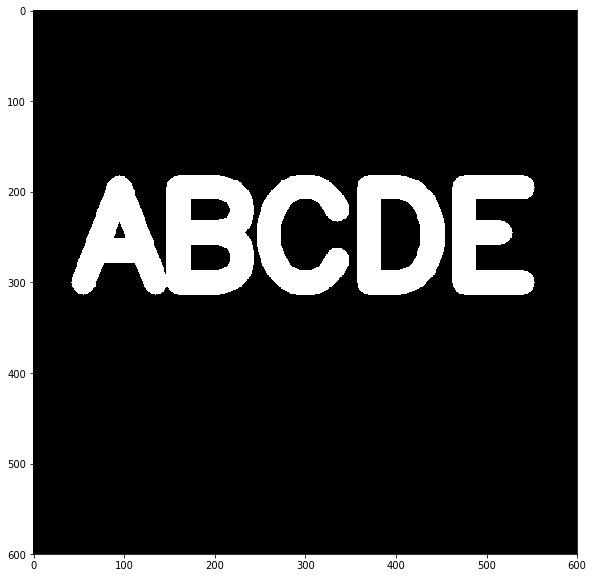

In [9]:
img = load_img()
display_img(img)

<h3> Create a Kernel as we did in Blurring </h3>

In [13]:
kernel = np.ones((5,5), dtype=np.uint8)
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

<h3> Lets try Erosion first </h3>

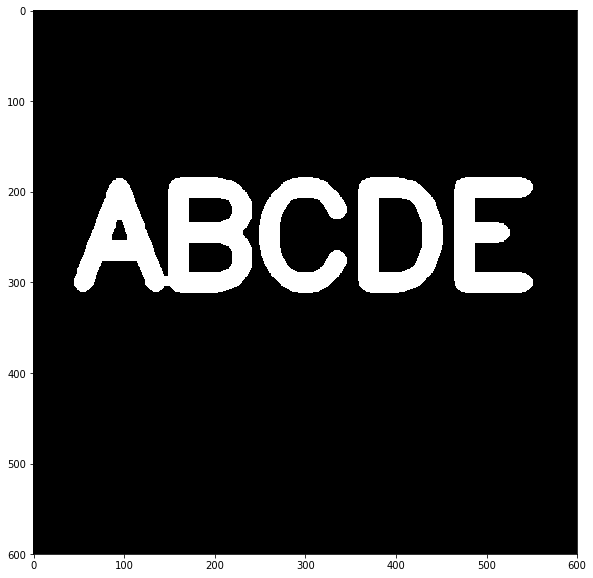

In [14]:
eroded_img = cv.erode(img, kernel, iterations = 1)
display_img(eroded_img)

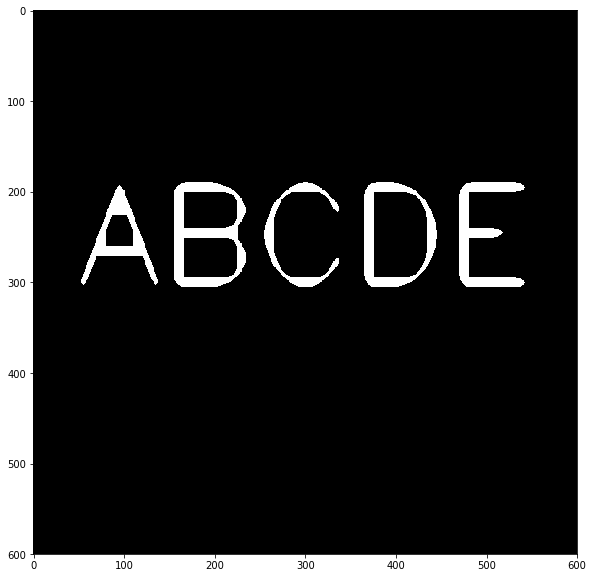

In [15]:
eroded_img2 = cv.erode(img, kernel, iterations = 4)
display_img(eroded_img2)

<h2>Lets try to reduce the noise using Morphological operators</h2>
But first lets create a noisy image

In [44]:
white_noise = np.random.randint(low=0, high=2, size=(600,600), dtype = np.uint16)

In [45]:
white_noise

array([[0, 1, 0, ..., 0, 1, 1],
       [0, 1, 0, ..., 0, 1, 0],
       [1, 1, 1, ..., 1, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 1, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 1, 1]], dtype=uint16)

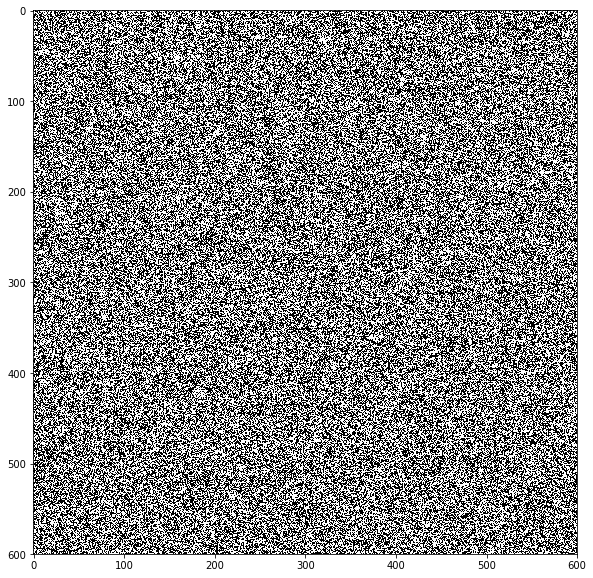

In [46]:
display_img(white_noise)

In [47]:
# Because max of our image is 255 (range is 0-255 not 0-1)
white_noise = white_noise * 255

In [48]:
# Add the noise to the image now (creating background noise)
noisy_img = img + white_noise

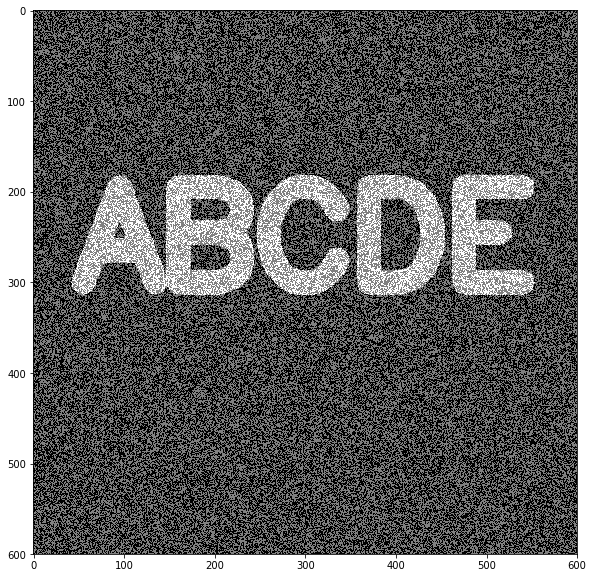

In [49]:
display_img(noisy_img)

In [50]:
# open morph cause erosion and then dilation
opening = cv.morphologyEx(noisy_img, cv.MORPH_OPEN, kernel)

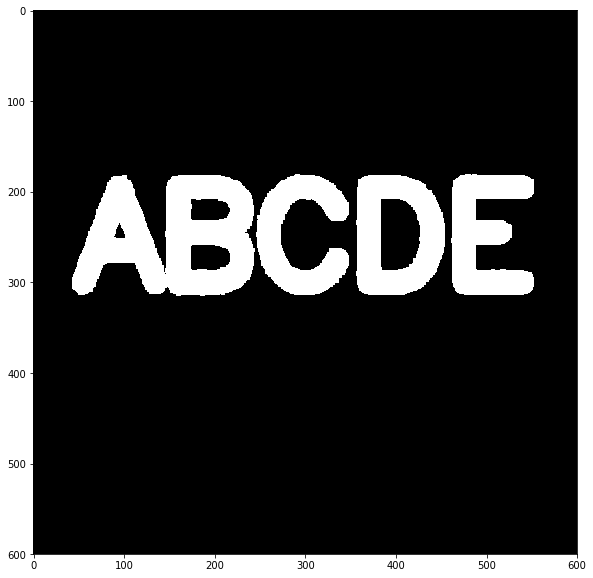

In [51]:
display_img(opening)

<h3> Lets try some background noise </h3>

In [69]:
black_noise = np.random.randint(low=0, high=2, size=(600,600), dtype=np.uint16)

In [70]:
black_noise = black_noise * -255

In [71]:
black_noise

array([[-255,    0,    0, ..., -255, -255,    0],
       [   0,    0, -255, ...,    0, -255, -255],
       [   0, -255,    0, ..., -255,    0,    0],
       ...,
       [   0,    0, -255, ..., -255,    0, -255],
       [-255,    0, -255, ...,    0, -255, -255],
       [-255,    0, -255, ..., -255,    0,    0]], dtype=int32)

In [72]:
noisy_image = black_noise + img

In [73]:
noisy_image[noisy_image==-255] = 0

In [74]:
# OpenCV required data type for morphological operators to be of unsigned type
noisy_image = noisy_image.astype(dtype=np.uint16)

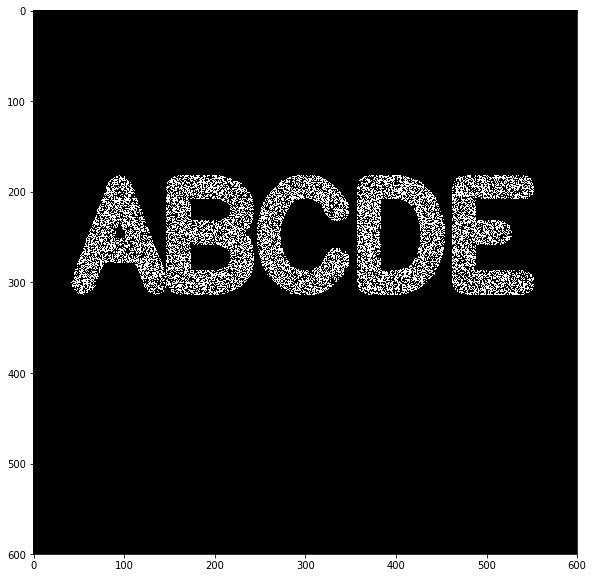

In [75]:
display_img(noisy_image)
# Foreground noise

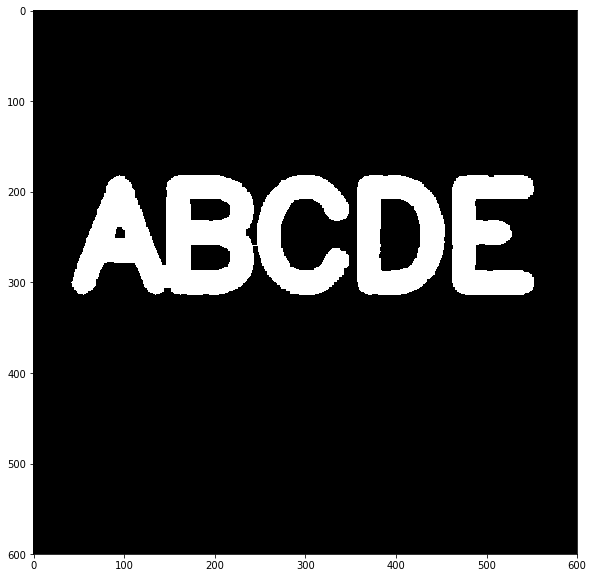

In [76]:
# Closing is better suited for foreground noise
closing = cv.morphologyEx(noisy_image, cv.MORPH_CLOSE, kernel)
display_img(closing)

<h3> Gradient takes the difference of dilation and erosion </h3>

In [77]:
img = load_img()

In [78]:
gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)

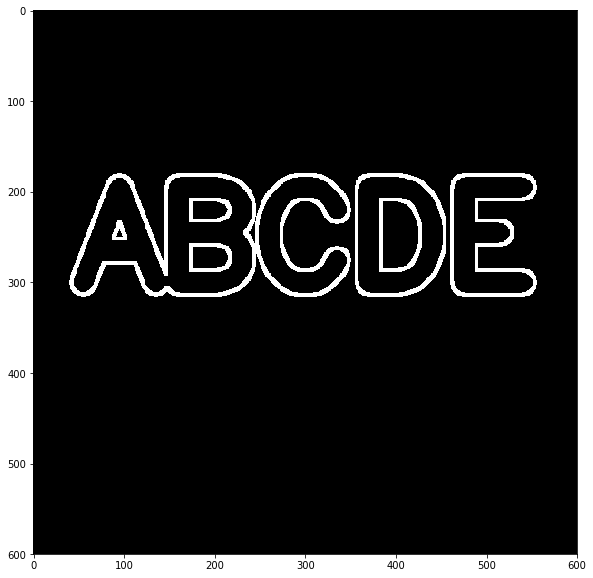

In [79]:
display_img(gradient)